## Initialization

### Initialization

In [19]:
import sys
#sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/Modules')
sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

#Import packages
#imports
import time
import pandas as pd
from collections import Counter
import sknetwork


from sknetwork.ranking import PageRank
from sknetwork.ranking import Betweenness
from sknetwork.ranking import Closeness

#import umap as umap

from numba.typed import List
import warnings
from numba import njit
import pynndescent
import numpy as np
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import operator
from sklearn.utils.extmath import randomized_svd
from random import randint
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD
import scipy
#from umap.umap_ import *
import math
from random import randint
import keras
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.datasets import fashion_mnist
import scanpy
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score, roc_auc_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

#import community as community_louvain
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score

import scipy

import igraph 
import networkx as nx


import metric as met 
import embedding as embed   
import data_utils_ch as data_util

In [20]:
%load_ext autoreload
%autoreload 2
import importlib

import metric as met 
import embedding as embed   
import data_utils_ch as data_util


met=importlib.reload(met)
embed=importlib.reload(embed)
data_util=importlib.reload(data_util)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Get edge Lists

In [ ]:
#This is to get the edge_lists.

#scRNA datasets
datanames=['Zhengmix8eq']
for name in datanames:
    edge_list,vlist,n,label=data_util.local_SCRNA(name)
    print("Dataset names is ",name," |V|, |E| #clusters= ",n,len(edge_list),len(set(label)))


#These are for the bulk-RNA datasets.
datanames=['mRNA','miRNA']
for name in datanames:
    for survive in [0,1]:
        edge_list,vlist,label,n=data_util.local_bulkRNA(name,survive)
        label=data_util.set_labels(label)
        print("Dataset names is ",name," |V|, |E| #clusters= ",n,len(edge_list),len(set(label)))



#These contain image and document data.
#datanames=['FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups','biorxiv','big_patent']
datanames=['FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent']
for name in datanames:
    edge_list, label=data_util.load_data(name,kchoice=10)
    n=len(label)
    vlist=[i for i in range(n)]
    label=data_util.set_labels(label)

    print("Dataset names is ",name," |V|, |E| #clusters= ",n,len(edge_list),len(set(label)))


#These are data of 4 popular directed graphs. 
graphnames=['Cora','Cora full','Citeseer','Eu core']
for name in graphnames:
    edge_list,vlist,label,n,good_v=data_util.graph_database(name)
    label=data_util.set_labels(label)

    print("Dataset names is ",name," |V|, |E| #clusters= ",n,len(edge_list),len(set(label)))

Zhengmix8eq 3994
Log transform done
(3994, 50)
Accuracy of  15 -NN graph is 0.792
59910
Dataset names is  Zhengmix8eq  |V|, |E| #clusters=  3994 59910 8
[0 1 2 3 4 5 6 7 8 9]
(11235, 19939)
selected vertices  11235
(11235,) Counter({'TCGA-BRCA': 1226, 'TCGA-KIRC': 610, 'TCGA-LUAD': 589, 'TCGA-UCEC': 585, 'TCGA-THCA': 572, 'TCGA-HNSC': 566, 'TCGA-PRAD': 554, 'TCGA-LUSC': 552, 'TCGA-LGG': 534, 'TCGA-COAD': 514, 'TCGA-SKCM': 473, 'TCGA-STAD': 448, 'TCGA-OV': 429, 'TCGA-BLCA': 428, 'TCGA-LIHC': 424, 'TCGA-KIRP': 323, 'TCGA-CESC': 309, 'TCGA-SARC': 265, 'TCGA-ESCA': 198, 'TCGA-PCPG': 187, 'TCGA-PAAD': 183, 'TCGA-READ': 177, 'TCGA-GBM': 174, 'TCGA-TGCT': 156, 'TCGA-LAML': 151, 'TCGA-THYM': 122, 'TCGA-KICH': 91, 'TCGA-MESO': 87, 'TCGA-UVM': 80, 'TCGA-ACC': 79, 'TCGA-UCS': 57, 'TCGA-DLBC': 48, 'TCGA-CHOL': 44})
33 32
Dataset names is  mRNA  |V|, |E| #clusters=  11235 168525 33
[ 5  6 10 11 12 14 16 17 25 26]
(9737, 19939)
selected vertices  9737
(9737,) Counter({0: 6980, 1: 2757})
2 1
Dataset 

### Raw Data

In [ ]:
#To get the raw data.

#scRNA datasets
datanames=['Zhengmix8eq']
for name in datanames:
    X,n,label=data_util.local_SCRNA(name,raw=1)



#These are for the bulk-RNA datasets.
datanames=['mRNA','miRNA']
for name in datanames:
    for survive in [0,1]:
        X,label,n=data_util.local_bulkRNA(name,survive)
        label=data_util.set_labels(label)



#These contain image and document data.
#datanames=['FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups','biorxiv','big_patent']
datanames=['FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','biorxiv','big_patent']
for name in datanames:
    X,label=data_util.load_data(name,raw=1)
    n=len(label)
    label=data_util.set_labels(label)






TypeError: local_SCRNA() got an unexpected keyword argument 'raw'

## Testing every dataset with top k % nodes induced subgraph (Louvain)

### Functions for Tok k% induced Subgraph

In [11]:
import FlowRank_General as FR
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
def getInducedSubgraph(G, k, node2FR): #G = original graph, k = pick top k percent, node2FR = node to FR value
    #Get top k% nodes
    node_list = sorted(G.nodes, key=lambda x: node2FR[x], reverse=True)
    k = int(k*len(node_list))
    top_nodes = node_list[:k]
    #Remove nodes also remove adjacent edges
    H = G.copy()
    for u in G.nodes:
        if u not in top_nodes:
            H.remove_node(u)
    return H, node_list

def FlowRank_Func(edge_list,vlist,walk_len_c1,c_const=0,type=0):
    if type==0:
        return FR.FLOW(edge_list,vlist,walk_len_c1,c_const)
    elif type==1:
        return FR.FLOW_ng(edge_list,vlist,walk_len_c1,c_const)
    elif type==2:
        return FR.FLOW_ng_prop(edge_list,vlist,walk_len_c1,c_const)

def calc_FlowRank(graph, FR_type, walk_len_c1):
    node2FR = dict()
    if FR_type==3:
        pg_rank = nx.pagerank(graph,alpha=0.85) #alpha = 0.85 is the default
        node2FR = {k: pg_rank[k]*graph.number_of_nodes() for k in pg_rank}
    else:
        for i in FlowRank_Func(graph.edges(),graph.nodes(),walk_len_c1,0,FR_type):
            node_num = int(i[1])
            node2FR[node_num] = i[0]
    return node2FR

def part_to_compressed_label(partition,H,original_n): #partition to labels (Returns compressed labels)
    #Mapping node numbers to index
        
    label_1=[-1]*(original_n)
    c=0
    for sets in partition:
        for ell in sets:
            label_1[ell]=c
        
        c=c+1
    
    label_compressed = []
    for i in sorted(H.nodes()):
        if label_1[i] == -1: 
            print('Error: Node not found in partition')
            return None
        label_compressed.append(label_1[i])
    #print(label_compressed)
    return label_compressed

def part_to_full_label(partition, original_n): #partition to labels (Returns full labels)
    #Mapping node numbers to index
        
    label_1=[-1]*(original_n)
    c=0
    for sets in partition:
        for ell in sets:
            label_1[ell]=c
        
        c=c+1
    #print(label_compressed)
    return label_1

def get_NMI(H, partition, label, original_n):
    #Keep the labels of the nodes in subgraph G only
    new_label = []
    for i in sorted(H.nodes()):
        #print('node: ',i)
        new_label.append(label[i])
    #change the partition form {[node2,node4], [,...,]} to label form {[0,2,1,2,grp#,...]}
    part_label = part_to_compressed_label(partition,H, original_n)
    
    # arr = np.array(part_label)
    # arr = arr.flatten()
    # nmi = NMI(arr, new_label)

    nmi = NMI(part_label, new_label)
    return nmi

def get_NMI2(H_label, label):
    n = len(label)
    label_compressed = []
    for i in range(n):
        if H_label[i] != -1:
            label_compressed.append(label[i])
    
    H_label_compressed = []
    for i in range(n):
        if H_label[i] != -1:
            H_label_compressed.append(H_label[i])

    nmi_ = NMI(H_label_compressed, label_compressed)   
    #nmi_ = NMI(H_label_compressed, label_compressed)
    #print('nmi: ',nmi_, 'node #: ',len(H_label_compressed))
    return nmi_
        
def get_Purity(H, partition, label, original_n):
    #Keep the labels of the nodes in subgraph G only
    new_label = []
    for i in sorted(H.nodes()):
        #print('node: ',i)
        new_label.append(label[i])
    #change the partition form {[node2,node4], [,...,]} to label form {[0,2,1,2,grp#,...]}
    part_label = part_to_compressed_label(partition,H, original_n)
    
    arr = np.array(part_label)
    arr = arr.flatten()
    purity = met.purity_score(arr, new_label)
    return purity

def relabel_graph(H): #compress the node numberings 
    mapping = dict(zip(H.nodes(), range(H.number_of_nodes())))
    H = nx.relabel_nodes(H, mapping)
    return H

def check_if_has_edge(H, partition_):
    for i in H.nodes():
        for j in H.nodes():
            if i!=j and H.has_edge(i,j):
                #find i in partition_
                for k in range(len(partition_)):
                    if i in partition_[k]:
                        if j not in partition_[k]:
                            print('Edge between nodes:',i,j) #Edge between two different communities
    return

# def make_graph(edge_list):
#     G = nx.Graph(edge_list)
#     return G
                                            

### Functions for Converting Dataset into a NetworkX Graph

In [15]:
def data_to_graph(name, survive=0):
    #scRNA datasets
    if name in ['Zhengmix8eq']:
        edge_list,vlist,n,label=data_util.local_SCRNA(name)
        #print("Dataset names is ",name," |V|, |E| #clusters= ",n,len(edge_list),len(set(label)))

    #These are for the bulk-RNA datasets.
    elif name in ['mRNA','miRNA']:
        #for survive in [0,1]:
        edge_list,vlist,label,n=data_util.local_bulkRNA(name,survive)
        label=data_util.set_labels(label)
        #print("Dataset names is ",name," |V|, |E| #clusters= ",n,len(edge_list),len(set(label)))

    #These contain image and document data.
    #datanames=['FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups','biorxiv','big_patent']
    elif name in ['FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent']:
        edge_list, label=data_util.load_data(name,kchoice=10)
        n=len(label)
        vlist=[i for i in range(n)]
        label=data_util.set_labels(label)
        #print("Dataset names is ",name," |V|, |E| #clusters= ",n,len(edge_list),len(set(label)))


    #These are data of 4 popular directed graphs. 
    elif name in ['Cora','Cora full','Citeseer','Eu core']:
        edge_list,vlist,label,n,good_v=data_util.graph_database(name)
        label=data_util.set_labels(label)
        #print("Dataset names is ",name," |V|, |E| #clusters= ",n,len(edge_list),len(set(label)))
    
    G = nx.DiGraph(edge_list)
    return G, label

def write_out(data, name, max_nmi, max_purity):
    with open('./Results/'+data+'.txt', 'a') as f:
        f.write(name+'\n')
    with open('./Results/'+data+'.txt', 'a') as f:
        f.write('   Max NMI = [' + str(round(max_nmi[0],3)) + ',' + str(round(max_nmi[1],3)) + ']' + ' res:= ' + str(round(max_nmi[2],3)) + '\n')
    
    with open('./Results/'+data+'.txt', 'a') as f:
        f.write('   Partition sizes: [')
    for i in max_nmi[4]:
        #print(len(i),end=' ')
        with open('./Results/'+data+'.txt', 'a') as f:
            f.write(str(len(i))+', ')
    with open('./Results/'+data+'.txt', 'a') as f:
        f.write('] ' + '# of comm: ' + str(len(max_nmi[4]))+ '\n')
    
    
    with open('./Results/'+data+'.txt', 'a') as f:
        f.write('   Max Purity = [' + str(round(max_purity[0],3)) + ',' + str(round(max_purity[1],3)) + ']' + ' res:= ' + str(round(max_purity[2],3)) + '\n')
    with open('./Results/'+data+'.txt', 'a') as f:
        f.write('   Partition sizes: [')
    for i in max_purity[4]:
        with open('./Results/'+data+'.txt', 'a') as f:
            f.write(str(len(i))+', ')
    with open('./Results/'+data+'.txt', 'a') as f:
        f.write('] ' + '# of comm: ' + str(len(max_purity[4]))+ '\n')

###  Top K subgraph testing

In [60]:
import analysis as an
#import Cust_Final as RC10
import networkx.algorithms.community.louvain as Louv
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from collections import deque

res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

data_names = ['Zhengmix8eq','mRNA','miRNA','FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent','Cora','Cora full','Citeseer','Eu core']
# FR_ord = ['Rd', 'Ord']
# FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_ng_prop','PageRank']
Num_hops = ['5','log(n)']
Mod_tp = {0: 'Louv'}

#top k% nodes for induced subgraph
k=0.2
for data in data_names: 
    for survive in [0,1]:
        '''
        Get the Graph from Edge_List and get the labels
        '''
        #DO not recalculate Graph for non bulk RNA datasets
        if data not in ['mRNA','miRNA'] and survive==1:
            continue
        G, label= data_to_graph(data,survive)
        print('Number of nodes:',G.number_of_nodes())
        #get unique entry in label
        with open('./Results/'+data+'.txt', 'a') as f:
            f.write('True Labels: [')
            for i in list(set(label)):
                f.write(str(i)+', ')
            f.write('] # of Comms: ' + str(len(list(set(label))))+ '\n')

        for Num_hop in [0,1]:
            for FR_type in range(4):
                for Mod_type in [0]:
                    #skip survive for non bulk RNA datasets
                    if data not in ['mRNA','miRNA'] and survive==1:
                        continue
                    #Do pagerank once only (No different hops for PageRank)
                    if FR_type==3 and Num_hop==0:
                        continue

                    name =  data + ' (top ' + str(k*100) + '%): '+ str(FR_tp[FR_type]) + ' + '+ str(Num_hops[Num_hop]) +' hops'
                    if FR_type==3:
                        name = data + ' (top ' + str(k*100) + '%): PageRank'
                    if data in ['mRNA','miRNA']:
                        name = data +  ' (top ' + str(k*100) + '%): '+ str(FR_tp[FR_type]) + ' + '+ str(Num_hops[Num_hop]) +' hops' + ' + Survive: '+str(survive)
                        if FR_type==3:
                            name = data + ' (top ' + str(k*100) + '%): PageRank' + ' + Survive: '+str(survive)
                    #print(name)
                    
                    
                    '''
                    Get induced subgraph of top k% nodes in FR value
                    '''
                    #Get induced subgraph
                    if Num_hop==0:
                        node2FR = calc_FlowRank(G, FR_type, 5)
                    else:
                        node2FR = calc_FlowRank(G, FR_type, np.log2(G.number_of_nodes()))
                    H = getInducedSubgraph(G, k, node2FR)
                    #print('Number of nodes in subgraph:',H.number_of_nodes())

                    '''
                    Calculate NMI and Purity for different resolutions
                    '''
                    max_nmi = (0,0,0,0,[]) # (nmi, purity, res, FR_type, partition)
                    max_purity = (0,0,0,0,[])
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20+0.01)
                    
                    for res in res_list:
                        #partition = RC10.louvain_partitions(H, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                        partition = Louv.louvain_partitions(H, seed=0,resolution=res)

                        partition_ = deque(partition, maxlen=1).pop()

                        nmi_ = get_NMI(H,partition_,label, G.number_of_nodes())
                        purity_ = get_Purity(H,partition_,label, G.number_of_nodes())
                        #print('NMI:', nmi_,'res:',res)
                        if nmi_>max_nmi[0]:
                            max_nmi = (nmi_,purity_,res,FR_type,partition_)
                        if purity_>max_purity[1]:
                            max_purity = (nmi_,purity_,res,FR_type,partition_)
                    '''
                    Write the results to Results folder
                    '''
                    write_out(data, name, max_nmi, max_purity)
                    #print(' Max NMI = [' , round(max_nmi[0],3), ',', round(max_nmi[1],3), ']', ' res:= ', round(max_nmi[2],3))
                    #print('Partition sizes:',end=' ')
                    # for i in max_nmi[4]:
                    #     print(len(i),end=' ')
                    # print()  
                    # 
                    #  #print(' Max Purity = [' , round(max_purity[0],3), ',', round(max_purity[1],3), ']', ' res:= ', round(max_purity[2],3))
                    # #print('Partition sizes:',end=' ')
                    # for i in max_purity[4]:
                    #    print(len(i),end=' ')
                    # print()  



Zhengmix8eq 3994
Log transform done
(3994, 50)
Accuracy of  15 -NN graph is 0.792
59910
Number of nodes: 3994
[0 1 2 3 4 5 6 7 8 9]
(11235, 19939)
selected vertices  11235
(11235,) Counter({'TCGA-BRCA': 1226, 'TCGA-KIRC': 610, 'TCGA-LUAD': 589, 'TCGA-UCEC': 585, 'TCGA-THCA': 572, 'TCGA-HNSC': 566, 'TCGA-PRAD': 554, 'TCGA-LUSC': 552, 'TCGA-LGG': 534, 'TCGA-COAD': 514, 'TCGA-SKCM': 473, 'TCGA-STAD': 448, 'TCGA-OV': 429, 'TCGA-BLCA': 428, 'TCGA-LIHC': 424, 'TCGA-KIRP': 323, 'TCGA-CESC': 309, 'TCGA-SARC': 265, 'TCGA-ESCA': 198, 'TCGA-PCPG': 187, 'TCGA-PAAD': 183, 'TCGA-READ': 177, 'TCGA-GBM': 174, 'TCGA-TGCT': 156, 'TCGA-LAML': 151, 'TCGA-THYM': 122, 'TCGA-KICH': 91, 'TCGA-MESO': 87, 'TCGA-UVM': 80, 'TCGA-ACC': 79, 'TCGA-UCS': 57, 'TCGA-DLBC': 48, 'TCGA-CHOL': 44})
33 32
Number of nodes: 11235
[ 5  6 10 11 12 14 16 17 25 26]
(9737, 19939)
selected vertices  9737
(9737,) Counter({0: 6980, 1: 2757})
2 1
Number of nodes: 9737
[0 1 2 3 4 5 6 7 8 9]
(11020, 1882)
selected vertices  11020
(11020

KeyboardInterrupt: 

### Top k% induced subgraph + Strong Majority Vote later

#### Strong Majority vote function

In [12]:
from collections import Counter, defaultdict
import random
def vote(G, H_label, node):
    #check every outgoing edge of node and counter the majority vote
    vt = defaultdict(int)
    for i in G.out_edges(node):
        #print('i:',i)
        vt[H_label[i[1]]] += 1
    #get the most common label
    most_common_label, most_common_count = Counter(vt).most_common(1)[0]
    
    #Strong Majority Vote
    if most_common_count < len(G.out_edges(node))/2:
        return -1
    else:
        return most_common_label
    
def merge_by_vote(reset_or_static, rand_or_FR_order, node_ordered_by_FR, NMI_List):
    flag = 1
    cnt = 0
    n = len(node_ordered_by_FR)
    if rand_or_FR_order==0: #0 = random order
        random.shuffle(node_ordered_by_FR)                    
    while(flag):
        flag = 0
        #Reset Traversal (If found a node to merge, start the loop over)
        if reset_or_static==0: #0 = reset
            for node in node_ordered_by_FR:
                #Already has a community assigned (Skip)
                if H_label[node] != -1:
                    continue
                new_comm = vote(G, H_label, node)
                if new_comm != -1:
                    H_label[node] = new_comm
                    flag=1
                    cnt +=1
                    #Calculate new NMI every 5% of nodes
                    if cnt > n/20:
                        new_nmi = get_NMI2(H_label, label)
                        #print('NMI:',new_nmi)
                        NMI_List.append(new_nmi)
                        cnt = 0
                    else:
                        NMI_List.append(NMI_List[-1])

                    break
        #Static Change (Update all nodes at once every loop) 
        else: #1 = static
            H_label_new = H_label.copy()
            for node in node_ordered_by_FR:
                #Already has a community assigned (Skip)
                if H_label[node] != -1:
                    continue
                new_comm = vote(G, H_label, node)
                if new_comm != -1:
                    H_label_new[node] = new_comm
                    flag=1
                    cnt +=1
                    if cnt > n/20:
                        new_nmi = get_NMI2(H_label, label)
                        #print('NMI:',new_nmi)
                        NMI_List.append(new_nmi)
                        cnt = 0
                    else:
                        NMI_List.append(NMI_List[-1])
            H_label = H_label_new
        return NMI_List

#### Top k + Strong Majority 

##### Working Most basic code

Zhengmix8eq 3994
Log transform done
(3994, 50)
Accuracy of  15 -NN graph is 0.793
59910
Number of nodes: 3994
Zhengmix8eq (top 20.0%): FL + 5 hops
Number of nodes not included:  31
NMI after top  20.0 % nodes: 0.776
Max NMI:  0.786
Zhengmix8eq (top 20.0%): FL_ng + 5 hops
Number of nodes not included:  10
NMI after top  20.0 % nodes: 0.832
Max NMI:  0.837
Zhengmix8eq (top 20.0%): FL_ng_prop + 5 hops
Number of nodes not included:  9
NMI after top  20.0 % nodes: 0.817
Max NMI:  0.823
Zhengmix8eq (top 20.0%): PageRank
Number of nodes not included:  163
NMI after top  20.0 % nodes: 0.821
Max NMI:  0.828


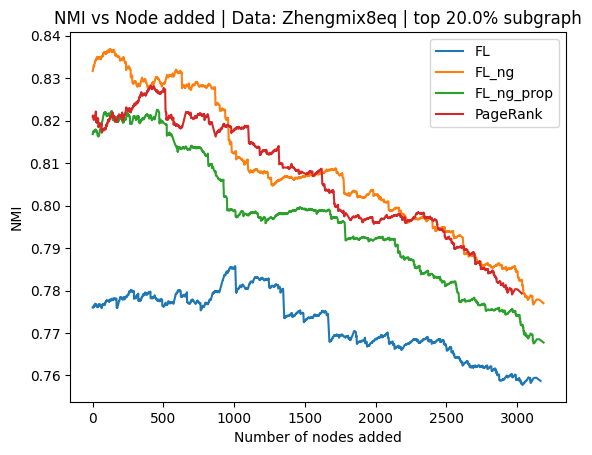

In [58]:
import analysis as an
#import Cust_Final as RC10
import networkx.algorithms.community.louvain as Louv
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from collections import deque
from matplotlib.backends.backend_pdf import PdfPages

res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

#data_names = ['Zhengmix8eq','mRNA','miRNA','FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent','Cora','Cora full','Citeseer','Eu core']
data_names = ['Zhengmix8eq']
# FR_ord = ['Rd', 'Ord']
# FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_ng_prop','PageRank']
Num_hops = ['5','log(n)']
Mod_tp = {0: 'Louv'}

#top k% nodes for induced subgraph
k=0.2


for data in data_names: 
    for survive in [0,1]:
        '''
        Get the Graph from Edge_List and get the labels
        '''
        #DO not recalculate Graph for non bulk RNA datasets
        if data not in ['mRNA','miRNA'] and survive==1:
            continue
        G, label= data_to_graph(data,survive)
        print('Number of nodes:',G.number_of_nodes())
        #get unique entry in label
        # with open('./Results/'+data+'.txt', 'a') as f:
        #     f.write('True Labels: [')
        #     for i in list(set(label)):
        #         f.write(str(i)+', ')
        #     f.write('] # of Comms: ' + str(len(list(set(label))))+ '\n')

        for Num_hop in [0]:
            for FR_type in range(4):
                for Mod_type in [0]:
                    #skip survive for non bulk RNA datasets
                    if data not in ['mRNA','miRNA'] and survive==1:
                        continue
                    #Do pagerank once only (No different hops for PageRank)
                    if FR_type==3 and Num_hop==1:
                        continue

                    name =  data + ' (top ' + str(k*100) + '%): '+ str(FR_tp[FR_type]) + ' + '+ str(Num_hops[Num_hop]) +' hops'
                    if FR_type==3:
                        name = data + ' (top ' + str(k*100) + '%): PageRank'
                    if data in ['mRNA','miRNA']:
                        name = data +  ' (top ' + str(k*100) + '%): '+ str(FR_tp[FR_type]) + ' + '+ str(Num_hops[Num_hop]) +' hops' + ' + Survive: '+str(survive)
                        if FR_type==3:
                            name = data + ' (top ' + str(k*100) + '%): PageRank' + ' + Survive: '+str(survive)
                    print(name)
                    
                    
                    '''
                    Get induced subgraph of top k% nodes in FR value
                    '''
                    #Get induced subgraph
                    if Num_hop==0:
                        node2FR = calc_FlowRank(G, FR_type, 5)
                    else:
                        node2FR = calc_FlowRank(G, FR_type, np.log2(G.number_of_nodes()))
                    H, node_ordered_by_FR = getInducedSubgraph(G, k, node2FR)
                    #print('Number of nodes in subgraph:',H.number_of_nodes())

                    '''
                    Calculate NMI and Purity for different resolutions
                    '''
                    max_nmi = (0,0,0,0,[]) # (nmi, purity, res, FR_type, partition)
                    max_purity = (0,0,0,0,[])
                    res_list = []
                    for i in range(10):
                        res_list.append(i/10+0.01)
                    
                    for res in res_list:
                        #partition = RC10.louvain_partitions(H, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                        partition = Louv.louvain_partitions(H, seed=0,resolution=res)
                        #partition = Louv.louvain_partitions(H,resolution=res)

                        partition_ = deque(partition, maxlen=1).pop()

                        nmi_ = get_NMI(H,partition_,label, G.number_of_nodes())
                        purity_ = get_Purity(H,partition_,label, G.number_of_nodes())
                        #print('NMI:', nmi_,'res:',res)
                        if nmi_>max_nmi[0]:
                            max_nmi = (nmi_,purity_,res,FR_type,partition_)
                        if purity_>max_purity[1]:
                            max_purity = (nmi_,purity_,res,FR_type,partition_)
                    '''
                    Write the results to Results folder
                    '''
                    #write_out(data, name, max_nmi, max_purity)
                    #print(' Max NMI = [' , round(max_nmi[0],3), ',', round(max_nmi[1],3), ']', ' res:= ', round(max_nmi[2],3))
                    '''
                    Add nodes to the subgraph by strong majority vote
                    '''
                    #See the trend by adding node to the subgraph by strong majority vote (in order of FlowRank Value)
                    H_label = part_to_full_label(max_nmi[4],G.number_of_nodes())
                    #print('H_label: ',H_label, 'len: ',len(H_label))
                    

                    NMI_List = []
                    NMI_List.append(max_nmi[0])

                    flag = 1

                    #node in the order of FR value

                    while(flag):
                        flag = 0
                        for node in node_ordered_by_FR:
                            #Already has a community assigned (Skip)
                            if H_label[node] != -1:
                                continue
                            new_comm = vote(G, H_label, node)
                            if new_comm != -1:
                                H_label[node] = new_comm
                                flag=1
                                #Calculate new NMI
                                new_nmi = get_NMI2(H_label, label)
                                #print('NMI:',new_nmi)
                                NMI_List.append(new_nmi)
                                break
                    #Plot NMI_List
                    #plot on the same graph
                    #x = [i for i in range(G.number_of_nodes() - H.number_of_nodes())]
                    plt.plot(NMI_List, label = str(FR_tp[FR_type]))
                    
                    # plt.title('NMI vs Number of nodes added ' + '| FR_type: ' + str(FR_tp[FR_type]) + ' ' + '| Data: ' + data)
                    # plt.show()
                    # #+1 because the first entry is the initial NMI
                    print('Number of nodes not included: ' , G.number_of_nodes() - H.number_of_nodes() - len(NMI_List)+1) 
                    print('NMI after top ', k*100, '% nodes:', round(NMI_List[0],3))
                    print('Max NMI: ', round(max(NMI_List),3))
        #Plot all at once
        plt.xlabel('Number of nodes added')
        plt.ylabel('NMI')
        plt.title('NMI vs Node added ' + '| Data: ' + data + ' | top ' + str(k*100) + '% subgraph')
        plt.legend()
        plt.show()     
                                
                    

                    
                    



In [ ]:
import matplotlib 
from matplotlib import pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages 

# customizing runtime configuration stored 
# in matplotlib.rcParams 
plt.rcParams["figure.figsize"] = [7.00, 3.50] 
plt.rcParams["figure.autolayout"] = True

plt.figure() 
plt.plot([17, 45, 7, 8, 7], color='orange') 

plt.figure() 
plt.plot([13, 25, 1, 6, 3], color='blue') 

plt.figure() 
plt.plot([22, 11, 2, 1, 23], color='green') 


def save_image(filename): 
	
	# PdfPages is a wrapper around pdf 
	# file so there is no clash and create 
	# files with no error. 
	p = PdfPages(filename) 
	
	# get_fignums Return list of existing 
	# figure numbers 
	fig_nums = plt.get_fignums() 
	figs = [plt.figure(n) for n in fig_nums] 
	
	# iterating over the numbers in list 
	for fig in figs: 
		
		# and saving the files 
		fig.savefig(p, format='pdf') 
	
	# close the object 
	p.close() 

# name your Pdf file 
filename = "multi_plot_image.pdf"

# call the function 
save_image(filename) 


##### PDF Export version (Final Working Version)

In [25]:
import analysis as an
#import Cust_Final as RC10
import networkx.algorithms.community.louvain as Louv
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from collections import deque
from matplotlib.backends.backend_pdf import PdfPages

res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

#data_names = ['Zhengmix8eq','mRNA','miRNA','FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent','Cora','Cora full','Citeseer','Eu core']
data_names = ['miRNA','FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent','Cora','Cora full','Citeseer','Eu core']

#data_names = ['Zhengmix8eq']
# FR_ord = ['Rd', 'Ord']
# FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_ng_prop','PageRank']
Num_hops = {0:'5',1:'log(n)'}
Mod_tp = {0: 'Louv'}

#top k% nodes for induced subgraph
k=0.2
reset_or_static = 0
rand_or_FR_order = 0 
traverse = {0:'Reset',1:'Static'}
ord = {0:'Rand',1:'FR_order'}

#list of plotted figures
figures = []

for data in data_names: 
    #pdf_name = './Plots/'+data+'(k =' + str(k*100) + '%).pdf'
    pdf_name = './Plots/'+data+'.pdf'
    for survive in [0]:
        '''
        Get the Graph from Edge_List and get the labels
        '''
        #DO not recalculate Graph for non bulk RNA datasets
        if data not in ['mRNA','miRNA'] and survive==1:
            continue
        G, label= data_to_graph(data,survive)
        print('Number of nodes:',G.number_of_nodes())
        #get unique entry in label
        # with open('./Results/'+data+'.txt', 'a') as f:
        #     f.write('True Labels: [')
        #     for i in list(set(label)):
        #         f.write(str(i)+', ')
        #     f.write('] # of Comms: ' + str(len(list(set(label))))+ '\n')

        for Num_hop in [0]:
            for res in [0.5,1,2]:
                for Mod_type in [0]:
                    plt.figure()
                    for FR_type in range(4):
                        #skip survive for non bulk RNA datasets
                        if data not in ['mRNA','miRNA'] and survive==1:
                            continue
                        #Do pagerank once only (No different hops for PageRank)
                        #if FR_type==3 and Num_hop==1:
                        #    continue

                        name =  data + ' (top ' + str(k*100) + '%): '+ str(FR_tp[FR_type]) + ' + '+ str(Num_hops[Num_hop]) +' hops'
                        if FR_type==3:
                            name = data + ' (top ' + str(k*100) + '%): PageRank'
                        if data in ['mRNA','miRNA']:
                            name = data +  ' (top ' + str(k*100) + '%): '+ str(FR_tp[FR_type]) + ' + '+ str(Num_hops[Num_hop]) +' hops' + ' + Survive: '+str(survive)
                            if FR_type==3:
                                name = data + ' (top ' + str(k*100) + '%): PageRank' + ' + Survive: '+str(survive)
                        print(name)
                        
                        
                        '''
                        Get induced subgraph of top k% nodes in FR value
                        '''
                        #Get induced subgraph
                        if Num_hop==0:
                            node2FR = calc_FlowRank(G, FR_type, 5)
                        else:
                            node2FR = calc_FlowRank(G, FR_type, np.log2(G.number_of_nodes()))
                        H, node_ordered_by_FR = getInducedSubgraph(G, k, node2FR)
                        #print('Number of nodes in subgraph:',H.number_of_nodes())

                        '''
                        Calculate NMI and Purity for different resolutions
                        '''
                        max_nmi = (0,0,0,0,[]) # (nmi, purity, res, FR_type, partition)
                        max_purity = (0,0,0,0,[])
                        
                        #partition = RC10.louvain_partitions(H, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                        partition = Louv.louvain_partitions(H, seed=0,resolution=res)
                        #partition = Louv.louvain_partitions(H,resolution=res)

                        partition_ = deque(partition, maxlen=1).pop()

                        nmi_ = get_NMI(H,partition_,label, G.number_of_nodes())
                        purity_ = get_Purity(H,partition_,label, G.number_of_nodes())
                        #print('NMI:', nmi_,'res:',res)
                        if nmi_>max_nmi[0]:
                            max_nmi = (nmi_,purity_,res,FR_type,partition_)
                        if purity_>max_purity[1]:
                            max_purity = (nmi_,purity_,res,FR_type,partition_)
                        '''
                        Write the results to Results folder
                        '''
                        #write_out(data, name, max_nmi, max_purity)
                        #print(' Max NMI = [' , round(max_nmi[0],3), ',', round(max_nmi[1],3), ']', ' res:= ', round(max_nmi[2],3))
                        '''
                        Add nodes to the subgraph by strong majority vote
                        '''
                        #See the trend by adding node to the subgraph by strong majority vote (in order of FlowRank Value)
                        H_label = part_to_full_label(max_nmi[4],G.number_of_nodes())
                        #print('H_label: ',H_label, 'len: ',len(H_label))
                        

                        NMI_List = []
                        NMI_List.append(max_nmi[0])

                        NMI_List = merge_by_vote(reset_or_static, rand_or_FR_order, node_ordered_by_FR, NMI_List)
                        
                                   
                        
                        plt.plot(NMI_List, label = str(FR_tp[FR_type]))
                    
                        print('Number of nodes not included: ' , G.number_of_nodes() - H.number_of_nodes() - len(NMI_List)+1) 
                        print('NMI after top ', k*100, '% nodes:', round(NMI_List[0],3))
                        print('Max NMI: ', round(max(NMI_List),3))
                    
                #Plot all at once
                plt.xlabel('Number of nodes added after top ' + str(k*100) + '% nodes')
                plt.ylabel('NMI')
                plt.title(data + ' | top ' + str(k*100) + '%' + '| Num_hops: ' + str(Num_hops[Num_hop]) + '|res: ' + str(res)+ '|'
                          +str(traverse[reset_or_static]) + ' | ' + str(ord[rand_or_FR_order]))
                plt.legend()
    
    p = PdfPages(pdf_name)            
    fig_nums = plt.get_fignums() 
    figs = [plt.figure(n) for n in fig_nums] 
	
	# iterating over the numbers in list 
    for fig in figs: 
		# and saving the files 
        fig.savefig(p, format='pdf') 
	
	# close the object 
    p.close() 
    plt.close('all')
    
        
            

                                
                    

                    
                    



[0 1 2 3 4 5 6 7 8 9]
(11235, 19939)
selected vertices  11235
(11235,) Counter({'TCGA-BRCA': 1226, 'TCGA-KIRC': 610, 'TCGA-LUAD': 589, 'TCGA-UCEC': 585, 'TCGA-THCA': 572, 'TCGA-HNSC': 566, 'TCGA-PRAD': 554, 'TCGA-LUSC': 552, 'TCGA-LGG': 534, 'TCGA-COAD': 514, 'TCGA-SKCM': 473, 'TCGA-STAD': 448, 'TCGA-OV': 429, 'TCGA-BLCA': 428, 'TCGA-LIHC': 424, 'TCGA-KIRP': 323, 'TCGA-CESC': 309, 'TCGA-SARC': 265, 'TCGA-ESCA': 198, 'TCGA-PCPG': 187, 'TCGA-PAAD': 183, 'TCGA-READ': 177, 'TCGA-GBM': 174, 'TCGA-TGCT': 156, 'TCGA-LAML': 151, 'TCGA-THYM': 122, 'TCGA-KICH': 91, 'TCGA-MESO': 87, 'TCGA-UVM': 80, 'TCGA-ACC': 79, 'TCGA-UCS': 57, 'TCGA-DLBC': 48, 'TCGA-CHOL': 44})
33 32
Number of nodes: 11235
mRNA (top 20.0%): FL + 5 hops + Survive: 0
Number of nodes not included:  490
NMI after top  20.0 % nodes: 0.883
Max NMI:  0.89
mRNA (top 20.0%): FL_ng + 5 hops + Survive: 0
Number of nodes not included:  567
NMI after top  20.0 % nodes: 0.868
Max NMI:  0.879
mRNA (top 20.0%): FL_ng_prop + 5 hops + Survive: 

KeyboardInterrupt: 

<Figure size 700x350 with 0 Axes>

##### PDF Export Parallel Computation Version

In [27]:
import analysis as an
#import Cust_Final as RC10
import networkx.algorithms.community.louvain as Louv
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from collections import deque
from matplotlib.backends.backend_pdf import PdfPages
import concurrent.futures

res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

#data_names = ['Zhengmix8eq','mRNA','miRNA','FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent','Cora','Cora full','Citeseer','Eu core']
data_names = ['miRNA','FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent','Cora','Cora full','Citeseer','Eu core']

#data_names = ['Zhengmix8eq']
# FR_ord = ['Rd', 'Ord']
# FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_ng_prop','PageRank']
Num_hops = {0:'5',1:'log(n)'}
Mod_tp = {0: 'Louv'}

#top k% nodes for induced subgraph
k=0.2

#list of plotted figures
figures = []

def calc_in_parallel(data):
    #pdf_name = './Plots/'+data+'(k =' + str(k*100) + '%).pdf'
    pdf_name = './Plots/'+data+'.pdf'
    for survive in [0]:
        '''
        Get the Graph from Edge_List and get the labels
        '''
        #DO not recalculate Graph for non bulk RNA datasets
        if data not in ['mRNA','miRNA'] and survive==1:
            continue
        G, label= data_to_graph(data,survive)
        print('Number of nodes:',G.number_of_nodes())
        #get unique entry in label
        # with open('./Results/'+data+'.txt', 'a') as f:
        #     f.write('True Labels: [')
        #     for i in list(set(label)):
        #         f.write(str(i)+', ')
        #     f.write('] # of Comms: ' + str(len(list(set(label))))+ '\n')

        for Num_hop in [0]:
            for res in [0.5,1,2]:
                for Mod_type in [0]:
                    plt.figure()
                    for FR_type in range(4):
                        #skip survive for non bulk RNA datasets
                        if data not in ['mRNA','miRNA'] and survive==1:
                            continue
                        #Do pagerank once only (No different hops for PageRank)
                        #if FR_type==3 and Num_hop==1:
                        #    continue

                        name =  data + ' (top ' + str(k*100) + '%): '+ str(FR_tp[FR_type]) + ' + '+ str(Num_hops[Num_hop]) +' hops'
                        if FR_type==3:
                            name = data + ' (top ' + str(k*100) + '%): PageRank'
                        if data in ['mRNA','miRNA']:
                            name = data +  ' (top ' + str(k*100) + '%): '+ str(FR_tp[FR_type]) + ' + '+ str(Num_hops[Num_hop]) +' hops' + ' + Survive: '+str(survive)
                            if FR_type==3:
                                name = data + ' (top ' + str(k*100) + '%): PageRank' + ' + Survive: '+str(survive)
                        print(name)
                        
                        
                        '''
                        Get induced subgraph of top k% nodes in FR value
                        '''
                        #Get induced subgraph
                        if Num_hop==0:
                            node2FR = calc_FlowRank(G, FR_type, 5)
                        else:
                            node2FR = calc_FlowRank(G, FR_type, np.log2(G.number_of_nodes()))
                        H, node_ordered_by_FR = getInducedSubgraph(G, k, node2FR)
                        #print('Number of nodes in subgraph:',H.number_of_nodes())

                        '''
                        Calculate NMI and Purity for different resolutions
                        '''
                        max_nmi = (0,0,0,0,[]) # (nmi, purity, res, FR_type, partition)
                        max_purity = (0,0,0,0,[])
                        
                        #partition = RC10.louvain_partitions(H, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                        partition = Louv.louvain_partitions(H, seed=0,resolution=res)
                        #partition = Louv.louvain_partitions(H,resolution=res)

                        partition_ = deque(partition, maxlen=1).pop()

                        nmi_ = get_NMI(H,partition_,label, G.number_of_nodes())
                        purity_ = get_Purity(H,partition_,label, G.number_of_nodes())
                        #print('NMI:', nmi_,'res:',res)
                        if nmi_>max_nmi[0]:
                            max_nmi = (nmi_,purity_,res,FR_type,partition_)
                        if purity_>max_purity[1]:
                            max_purity = (nmi_,purity_,res,FR_type,partition_)
                        '''
                        Write the results to Results folder
                        '''
                        #write_out(data, name, max_nmi, max_purity)
                        #print(' Max NMI = [' , round(max_nmi[0],3), ',', round(max_nmi[1],3), ']', ' res:= ', round(max_nmi[2],3))
                        '''
                        Add nodes to the subgraph by strong majority vote
                        '''
                        #See the trend by adding node to the subgraph by strong majority vote (in order of FlowRank Value)
                        H_label = part_to_full_label(max_nmi[4],G.number_of_nodes())
                        #print('H_label: ',H_label, 'len: ',len(H_label))
                        

                        NMI_List = []
                        NMI_List.append(max_nmi[0])

                        flag = 1

                        #node in the order of FR value

                        while(flag):
                            flag = 0
                            for node in node_ordered_by_FR:
                                #Already has a community assigned (Skip)
                                if H_label[node] != -1:
                                    continue
                                new_comm = vote(G, H_label, node)
                                if new_comm != -1:
                                    H_label[node] = new_comm
                                    flag=1
                                    #Calculate new NMI
                                    new_nmi = get_NMI2(H_label, label)
                                    #print('NMI:',new_nmi)
                                    NMI_List.append(new_nmi)
                                    break
                        #Plot NMI_List
                        #plot on the same graph
                        #x = [i for i in range(G.number_of_nodes() - H.number_of_nodes())]
                        
                        plt.plot(NMI_List, label = str(FR_tp[FR_type]))
                        
                        # plt.title('NMI vs Number of nodes added ' + '| FR_type: ' + str(FR_tp[FR_type]) + ' ' + '| Data: ' + data)
                        # plt.show()
                        # #+1 because the first entry is the initial NMI
                        print('Number of nodes not included: ' , G.number_of_nodes() - H.number_of_nodes() - len(NMI_List)+1) 
                        print('NMI after top ', k*100, '% nodes:', round(NMI_List[0],3))
                        print('Max NMI: ', round(max(NMI_List),3))
                    
                #Plot all at once
                plt.xlabel('Number of nodes added after top ' + str(k*100) + '% nodes')
                plt.ylabel('NMI')
                plt.title('Data: ' + data + ' | top ' + str(k*100) + '% subgraph' + '| Num_hops: ' + str(Num_hops[Num_hop]) + '|res: ' + str(res)+ '|Reset Traversal')
                plt.legend()
    
    p = PdfPages(pdf_name)            
    fig_nums = plt.get_fignums() 
    figs = [plt.figure(n) for n in fig_nums] 
	
	# iterating over the numbers in list 
    for fig in figs: 
		# and saving the files 
        fig.savefig(p, format='pdf') 
	
	# close the object 
    p.close() 
    plt.close('all')
    
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(calc_in_parallel, data_names)
        
            

                                
                    

                    
                    



seeds (209, 7)
42 41
Number of nodes: 1005
Eu core (top 20.0%): FL + 5 hops
70 69
Number of nodes: 23166
Cora full (top 20.0%): FL + 5 hops
bbc_news (1490, 50)
big_patent (17064, 50)
biorxiv (68131, 50)
7 6
Number of nodes: 2485
Cora (top 20.0%): FL + 5 hops
20NewsGroups_tfdif (10909, 50)


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\sparse\_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Validation for `citeseer_labels` and `citeseer_features` passes.
7 6
Number of nodes: 2120
Citeseer (top 20.0%): FL + 5 hops
[0 1 2 3 4 5 6 7 8 9]
(11020, 1882)
selected vertices  11020
(11020,) Counter({'TCGA-BRCA': 1202, 'TCGA-KIRC': 592, 'TCGA-UCEC': 575, 'TCGA-THCA': 573, 'TCGA-HNSC': 569, 'TCGA-LUAD': 564, 'TCGA-PRAD': 551, 'TCGA-LGG': 530, 'TCGA-LUSC': 523, 'TCGA-OV': 498, 'TCGA-STAD': 477, 'TCGA-COAD': 461, 'TCGA-SKCM': 452, 'TCGA-BLCA': 432, 'TCGA-LIHC': 425, 'TCGA-KIRP': 326, 'TCGA-CESC': 312, 'TCGA-SARC': 263, 'TCGA-ESCA': 198, 'TCGA-LAML': 188, 'TCGA-PCPG': 187, 'TCGA-PAAD': 183, 'TCGA-READ': 165, 'TCGA-TGCT': 156, 'TCGA-THYM': 126, 'TCGA-KICH': 91, 'TCGA-MESO': 87, 'TCGA-UVM': 80, 'TCGA-ACC': 80, 'TCGA-UCS': 57, 'TCGA-DLBC': 47, 'TCGA-CHOL': 45, 'TCGA-GBM': 5})
3 2
Number of nodes: 209
seeds (top 20.0%): FL + 5 hops
Number of nodes not included:  128
NMI after top  20.0 % nodes: 0.725
Max NMI:  0.761
seeds (top 20.0%): FL_ng + 5 hops
Number of nodes not included:  101
NMI a

## Louv + Cust-Louv on All Datasets

### Codes

In [3]:
from collections import defaultdict, deque

def get_labels(partition,n_s):
    #final_partition_1 = deque(partition, maxlen=1).pop()
    #print(final_partition_1)


    label_1=np.zeros((n_s))
    c=0
    for sets in partition:
        for ell in sets:
            label_1[ell]=c
        
        c=c+1

    return label_1

In [74]:
import analysis as an
import Cust_Final as RC
#import networkx.algorithms.community.louvain as Louv
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from collections import deque

res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

#data_names = ['Zhengmix8eq','mRNA','miRNA','FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent','Cora','Cora full','Citeseer','Eu core']
data_names = ['miRNA','FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent','Cora','Cora full','Citeseer','Eu core']
# FR_ord = ['Rd', 'Ord']
# FR_Recalc = ['FR_avg', 'FR_Re']
FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_ng_prop','PageRank']
Mod_tp = {0:'Louv', 2:'Cust2', 6:'Cust6', 11:'Cust11'}


for data in data_names: 
    for survive in [0]:
    #for survive in [0,1]:
        '''
        Get the Graph from Edge_List and get the labels
        '''
        #DO not recalculate Graph for non bulk RNA datasets
        if data not in ['mRNA','miRNA'] and survive==1:
            continue
        G, label= data_to_graph(data,survive)
        print('Number of nodes:',G.number_of_nodes())
        #get unique entry in label
        with open('./Results/'+data+'.txt', 'a') as f:
            f.write('True Labels: [')
            for i in list(set(label)):
                f.write(str(i)+', ')
            f.write('] # of Comms: ' + str(len(list(set(label))))+ '\n')

        
        for FR_type in range(4):
            for FR_order in [0]:
                for FR_Rec in [0]:
                    for Mod_type in [0,2,6,11]:
                        #skip survive for non bulk RNA datasets
                        if data not in ['mRNA','miRNA'] and survive==1:
                            continue
                        
                        name =  data + '(All nodes): '+ str(FR_tp[FR_type]) + ' + '+ str(Mod_tp[Mod_type])
                        if FR_type==3:
                            name = data + ' (All nodes): PageRank' + ' + '+ str(Mod_tp[Mod_type])
                        if data in ['mRNA','miRNA']:
                            name = data + ' (All nodes): '+ str(FR_tp[FR_type]) + ' + '+ str(Mod_tp[Mod_type]) + ' + Survive: '+str(survive)
                            if FR_type==3:
                                name = data + ' (All nodes): PageRank' + ' + '+ str(Mod_tp[Mod_type]) + ' + Survive: '+str(survive)
                        #print(name)
                        
                        #Louvain doesn't have FlowRank values involved
                        if Mod_type==0:
                            name = data + ' (All nodes): '+ str(Mod_tp[Mod_type])
                        #Louvain just runs once
                        if Mod_type==0:
                            if FR_type!=0:
                                continue
                        #print('Number of nodes in subgraph:',H.number_of_nodes())

                        '''
                        Calculate NMI and Purity for different resolutions
                        '''
                        max_nmi = (0,0,0,0,[]) # (nmi, purity, res, FR_type, partition)
                        max_purity = (0,0,0,0,[])
                        res_list = []
                        for i in range(20):
                            res_list.append(i/10+0.01)
                        
                        for res in res_list:
                            partition = RC.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                            
                            partition_ = deque(partition, maxlen=1).pop()
                            label_new = get_labels(partition_,G.number_of_nodes())

                            nmi_ = NMI(label,label_new)
                            purity_ = met.purity_score(label,label_new)
                            #print('NMI:', nmi_,'res:',res)
                            if nmi_>max_nmi[0]:
                                max_nmi = (nmi_,purity_,res,FR_type,partition_)
                            if purity_>max_purity[1]:
                                max_purity = (nmi_,purity_,res,FR_type,partition_)
                        '''
                        Write the results to Results folder
                        '''
                        print ('Max NMI: ',max_nmi[0], 'at res: ',max_nmi[2])
                        write_out(data, name, max_nmi, max_purity)
                        #print(' Max NMI = [' , round(max_nmi[0],3), ',', round(max_nmi[1],3), ']', ' res:= ', round(max_nmi[2],3))
                        #print('Partition sizes:',end=' ')
                        # for i in max_nmi[4]:
                        #     print(len(i),end=' ')
                        # print()  
                        # 
                        #  #print(' Max Purity = [' , round(max_purity[0],3), ',', round(max_purity[1],3), ']', ' res:= ', round(max_purity[2],3))
                        # #print('Partition sizes:',end=' ')
                        # for i in max_purity[4]:
                        #    print(len(i),end=' ')
                        # print()  



[0 1 2 3 4 5 6 7 8 9]
(11020, 1882)
selected vertices  11020
(11020,) Counter({'TCGA-BRCA': 1202, 'TCGA-KIRC': 592, 'TCGA-UCEC': 575, 'TCGA-THCA': 573, 'TCGA-HNSC': 569, 'TCGA-LUAD': 564, 'TCGA-PRAD': 551, 'TCGA-LGG': 530, 'TCGA-LUSC': 523, 'TCGA-OV': 498, 'TCGA-STAD': 477, 'TCGA-COAD': 461, 'TCGA-SKCM': 452, 'TCGA-BLCA': 432, 'TCGA-LIHC': 425, 'TCGA-KIRP': 326, 'TCGA-CESC': 312, 'TCGA-SARC': 263, 'TCGA-ESCA': 198, 'TCGA-LAML': 188, 'TCGA-PCPG': 187, 'TCGA-PAAD': 183, 'TCGA-READ': 165, 'TCGA-TGCT': 156, 'TCGA-THYM': 126, 'TCGA-KICH': 91, 'TCGA-MESO': 87, 'TCGA-UVM': 80, 'TCGA-ACC': 80, 'TCGA-UCS': 57, 'TCGA-DLBC': 47, 'TCGA-CHOL': 45, 'TCGA-GBM': 5})
33 32
Number of nodes: 11020
Max NMI:  0.8354813887877923 at res:  0.61
Max NMI:  0.8185235033396749 at res:  1.81
Max NMI:  0.8342545951244514 at res:  1.81
Max NMI:  0.838109425507587 at res:  1.01
Max NMI:  0.834690943637039 at res:  1.61
Max NMI:  0.8342885942625952 at res:  1.31
Max NMI:  0.8389953858482124 at res:  0.71
Max NMI:  0.8

C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\sparse\_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


20 19
Number of nodes: 10909
Max NMI:  0.3365657118992977 at res:  1.91
Max NMI:  0.31730292551202643 at res:  1.81
Max NMI:  0.32002212735943963 at res:  1.91
Max NMI:  0.34182464951250596 at res:  1.91
Max NMI:  0.31955380714913795 at res:  1.81
Max NMI:  0.32258372115961387 at res:  1.91
Max NMI:  0.3439614162920427 at res:  1.91
Max NMI:  0.3229099077110389 at res:  1.51
Max NMI:  0.32819282454277704 at res:  1.91
Max NMI:  0.34096090096663195 at res:  1.91
Max NMI:  0.3426365319321868 at res:  1.91
Max NMI:  0.3385641133377422 at res:  1.91
Max NMI:  0.3402687193975797 at res:  1.91
biorxiv (68131, 50)
26 25
Number of nodes: 68131
Max NMI:  0.36170559657257567 at res:  1.81
Max NMI:  0.32608523686253266 at res:  1.81
Max NMI:  0.3409331462154175 at res:  1.51
Max NMI:  0.365511733997418 at res:  1.61
Max NMI:  0.3600729786772639 at res:  1.91
Max NMI:  0.3614542689499371 at res:  1.71
Max NMI:  0.36294932552347997 at res:  1.51
Max NMI:  0.362175457173279 at res:  1.41
Max NMI:  0

TypeError: invalid operation on untyped list

### Debugging

In [18]:
import analysis as an
import Cust_Final as RC
#import networkx.algorithms.community.louvain as Louv
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from collections import deque

res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

#data_names = ['Zhengmix8eq','mRNA','miRNA','FashionMNIST','MNIST','seeds','breast-cancer','Omniglot','bbc_news','20NewsGroups_tfdif','biorxiv','big_patent','Cora','Cora full','Citeseer','Eu core']
data_names = ['20NewsGroups_tfdif', 'Omniglot', 'Cora full']
#data_names = ['Omniglot']
# FR_ord = ['Rd', 'Ord']
# FR_Recalc = ['FR_avg', 'FR_Re']
FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_ng_prop','PageRank']
Mod_tp = {0:'Louv', 2:'Cust2', 6:'Cust6', 11:'Cust11'}


for data in data_names: 
    with open('./Results/'+data+'.txt', 'a') as f:
        f.write('__________________________________________________________________________________________\n')
    for survive in [0]:
    #for survive in [0,1]:
        '''
        Get the Graph from Edge_List and get the labels
        '''
        #DO not recalculate Graph for non bulk RNA datasets
        if data not in ['mRNA','miRNA'] and survive==1:
            continue
        G, label= data_to_graph(data,survive)
        print('Number of nodes:',G.number_of_nodes())
        #get unique entry in label
        with open('./Results/'+data+'.txt', 'a') as f:
            f.write('True Labels: [')
            for i in list(set(label)):
                f.write(str(i)+', ')
            f.write('] # of Comms: ' + str(len(list(set(label))))+ '\n')

        
        for FR_type in range(4):
            for FR_order in [0]:
                for FR_Rec in [0]:
                    for Mod_type in [0,2,6,11]:
                    #for Mod_type in [0]:
                        #skip survive for non bulk RNA datasets
                        if data not in ['mRNA','miRNA'] and survive==1:
                            continue
                        
                        name =  data + '(All nodes): '+ str(FR_tp[FR_type]) + ' + '+ str(Mod_tp[Mod_type])
                        if FR_type==3:
                            name = data + ' (All nodes): PageRank' + ' + '+ str(Mod_tp[Mod_type])
                        if data in ['mRNA','miRNA']:
                            name = data + ' (All nodes): '+ str(FR_tp[FR_type]) + ' + '+ str(Mod_tp[Mod_type]) + ' + Survive: '+str(survive)
                            if FR_type==3:
                                name = data + ' (All nodes): PageRank' + ' + '+ str(Mod_tp[Mod_type]) + ' + Survive: '+str(survive)
                        
                        
                        #Louvain doesn't have FlowRank values involved
                        if Mod_type==0:
                            name = data + ' (All nodes): '+ str(Mod_tp[Mod_type])
                        #Louvain just runs once
                        if Mod_type==0:
                            if FR_type!=0:
                                continue
                        #print('Number of nodes in subgraph:',H.number_of_nodes())
                        print(name)
                        '''
                        Calculate NMI and Purity for different resolutions
                        '''
                        max_nmi = (0,0,0,0,[]) # (nmi, purity, res, FR_type, partition)
                        max_purity = (0,0,0,0,[])
                        res_list = []
                        # for i in range(5):
                        #     res_list.append(i*10+100)
                        if data in ['Omniglot']:
                            for i in range(5):
                                res_list.append(i*10+100)
                        else:
                            for i in range(6):
                                res_list.append(i*5+5)
                        
                        for res in res_list:
                            partition = RC.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                            
                            partition_ = deque(partition, maxlen=1).pop()
                            label_new = get_labels(partition_,G.number_of_nodes())

                            nmi_ = NMI(label,label_new)
                            purity_ = met.purity_score(label,label_new)
                            #print('NMI:', nmi_,'res:',res)
                            if nmi_>max_nmi[0]:
                                max_nmi = (nmi_,purity_,res,FR_type,partition_)
                            if purity_>max_purity[1]:
                                max_purity = (nmi_,purity_,res,FR_type,partition_)
                        '''
                        Write the results to Results folder
                        '''
                        print ('Max NMI: ',max_nmi[0], 'at res: ',max_nmi[2])
                        write_out(data, name, max_nmi, max_purity)
                        #print(' Max NMI = [' , round(max_nmi[0],3), ',', round(max_nmi[1],3), ']', ' res:= ', round(max_nmi[2],3))
                        #print('Partition sizes:',end=' ')
                        # for i in max_nmi[4]:
                        #     print(len(i),end=' ')
                        # print()  
                        # 
                        #  #print(' Max Purity = [' , round(max_purity[0],3), ',', round(max_purity[1],3), ']', ' res:= ', round(max_purity[2],3))
                        # #print('Partition sizes:',end=' ')
                        # for i in max_purity[4]:
                        #    print(len(i),end=' ')
                        # print()  



20NewsGroups_tfdif (10909, 50)


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\sparse\_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


20 19
Number of nodes: 10909
20NewsGroups_tfdif (All nodes): Louv
Max NMI:  0.396732847670404 at res:  30
20NewsGroups_tfdif(All nodes): FL + Cust2
Max NMI:  0.366329937248378 at res:  30
20NewsGroups_tfdif(All nodes): FL + Cust6
Max NMI:  0.369594079963205 at res:  30
20NewsGroups_tfdif(All nodes): FL + Cust11
Max NMI:  0.39729713373644715 at res:  30
20NewsGroups_tfdif(All nodes): FL_ng + Cust2
Max NMI:  0.3734825557701003 at res:  30
20NewsGroups_tfdif(All nodes): FL_ng + Cust6
Max NMI:  0.37670622671419723 at res:  30
20NewsGroups_tfdif(All nodes): FL_ng + Cust11
Max NMI:  0.39682733279922 at res:  30
20NewsGroups_tfdif(All nodes): FL_ng_prop + Cust2
Max NMI:  0.37887393323927027 at res:  30
20NewsGroups_tfdif(All nodes): FL_ng_prop + Cust6
Max NMI:  0.38110760609828687 at res:  30
20NewsGroups_tfdif(All nodes): FL_ng_prop + Cust11
Max NMI:  0.39833727432641913 at res:  30
20NewsGroups_tfdif (All nodes): PageRank + Cust2
Max NMI:  0.3946543788627885 at res:  30
20NewsGroups_tfdif (

i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc


Max NMI:  0.5359099075422863 at res:  30
Cora full(All nodes): FL_ng + Cust6


i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc


Max NMI:  0.5356883755645722 at res:  30
Cora full(All nodes): FL_ng + Cust11


i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc


Max NMI:  0.5365835943196885 at res:  25
Cora full(All nodes): FL_ng_prop + Cust2


i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc


Max NMI:  0.5359047049148887 at res:  30
Cora full(All nodes): FL_ng_prop + Cust6


i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc


Max NMI:  0.536045082877041 at res:  30
Cora full(All nodes): FL_ng_prop + Cust11


i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc
i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:424: RuntimeWarning: invalid value encountered in scalar divide
  rank[v]=v_cover[v]/sc


Max NMI:  0.5373232529205779 at res:  30
Cora full (All nodes): PageRank + Cust2
Max NMI:  0.5361867598895256 at res:  25
Cora full (All nodes): PageRank + Cust6
Max NMI:  0.5360665888362608 at res:  30
Cora full (All nodes): PageRank + Cust11
Max NMI:  0.5351212082235167 at res:  30
